# Oscillations for different ICs and Parameters

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from __future__ import absolute_import
import pylab as pl
from pydelay import dde23
import csv
import json

%matplotlib inline

# data = pd.read_csv('output.csv',delimiter=',')

In [2]:
def dde_main(k1i,k2i,k3i,k4i,qRi,tau_1i,tau_2i,Ai,Bi):
    # the model equations 
    eqns = { 
        'Ac' : '-k1*Rm*Ac',
        'Am' : 'k1*Rm(t-tau1)*Ac(t-tau1) - k2*Am*Rm + k3*AR - k2*Am*Bm + k3*AB',
        'Bc' : '-k4*Am*Bc',
        'Bm' : 'k4*Am(t-tau2)*Bc(t-tau2) - k2*Am*Bm + k3*AB',
        'Rm' : 'qR - k2*Am*Rm + k3*AR',
        'AB' : 'k2*Am*Bm - k3*AB',
        'AR' : 'k2*Am*Rm - k3*AR'
        }

    # define parameters
    params = {
        'k1' : k1i,           
        'k2' : k2i,
        'k3' : k3i,
        'k4' : k4i,
        'qR' : qRi,
        'tau1' : tau_1i,
        'tau2' : tau_2i
        }

    # initial conditions
    init_cond = {
        'Ac' : Ai,
        'Am' : 0,
        'Bc' : Bi,
        'Bm' : 0,
        'Rm' : 0.,
        'AB' : 0,
        'AR' : 0
        }

    # intialize the solver
    dde = dde23(eqns=eqns, params=params)

    # set the simulation parameters
    # (solve from t=0 to tfinal and limit the maximum step size to 1.0) 
    dde.set_sim_params(tfinal=10000, dtmax = 1.0 )


    # set the history of the proteins
    histfunc = {
        'Ac' : lambda t: init_cond['Ac'], 
        'Am' : lambda t: init_cond['Am'],
        'Bc' : lambda t: init_cond['Bc'],
        'Bm' : lambda t: init_cond['Bm'],
        'Rm' : lambda t: init_cond['Rm'],
        'AB' : lambda t: init_cond['AB'],
        'AR' : lambda t: init_cond['AR']
            }
    dde.hist_from_funcs(histfunc, 500)

    # run the simulator
    dde.run()

    sol1 = dde.sample(0,10000,0.1)

    t = sol1['t']
    Ac = sol1['Ac']
    Am = sol1['Am']
    Bc = sol1['Bc']
    Bm = sol1['Bm']
    Rm = sol1['Rm']
    AB = sol1['AB']
    AR = sol1['AR']

    # print the IC's and constants
    print("The parameters used were:")
    print(json.dumps(params, indent = 1, sort_keys=True))

    print("The initial conditions used were: ")
    print(json.dumps(init_cond, indent = 1, sort_keys=True))

    return(t,Am,Bm,Rm,Ac)

def Rmslope(Rm):
    Rm_slope = []
    for i in range(0,len(t)-1):
        slope = (Rm[i+1] - Rm[i])/(t[i+1]-t[i])
        Rm_slope.append(slope)
    Rm_slope.append(Rm_slope[-1])
    
    return(Rm_slope)

# To Do:  Only keep peaks that are greater than a threshold concentration
def Rm_max(Rm_slope):
    max_list = []
    time_max = []
    for i in range(0,len(Rm_slope)-1):
        if Rm_slope[i]>0 and Rm_slope[i+1]<0 and Rm[i]>0.005:
            max_list.append(Rm[i+1])
            time_max.append(t[i+1])
    
    return(time_max, max_list)

### We begin with the ICs and parameters that were used in the update DC_Mar21.pdf

The parameters used were:
{
 "k1": 0.001, 
 "k2": 0.75, 
 "k3": 0.0003, 
 "k4": 0.001, 
 "qR": 0.035, 
 "tau1": 48.0, 
 "tau2": 59.3
}
The initial conditions used were: 
{
 "AB": 0, 
 "AR": 0, 
 "Ac": 400, 
 "Am": 0, 
 "Bc": 100, 
 "Bm": 0, 
 "Rm": 0.0
}


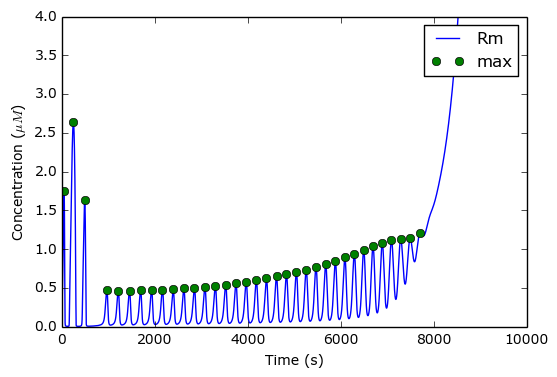

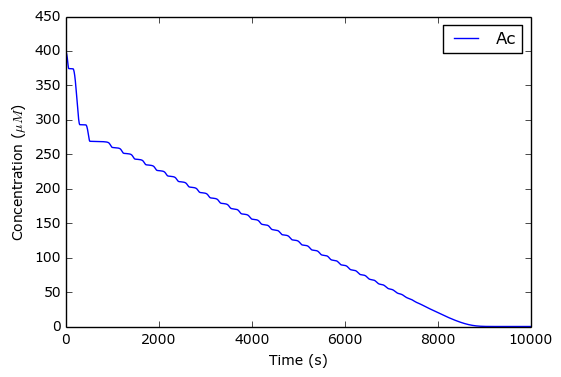

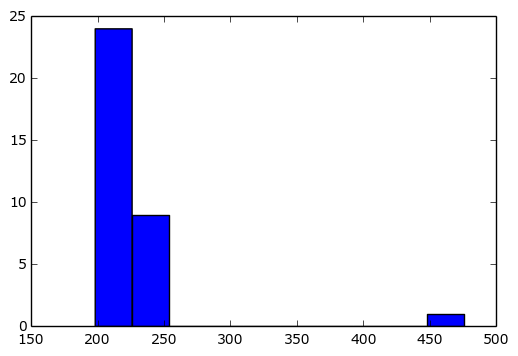

The mean period of oscillations is 225.385294118


In [3]:
(t,Am,Bm,Rm,Ac) = dde_main(0.001,0.75,0.0003,0.001,0.035,48.0,59.3,400,100)
(t_max, R_max) = Rm_max(Rmslope(Rm))

plt.plot(t,Rm,label="Rm")
plt.plot(t_max, R_max,"o", label="max")
plt.ylim([0,4])
plt.xlabel("Time (s)")
plt.ylabel('Concentration ($\mu M$)')
plt.legend()
plt.show()

plt.plot(t,Ac,label="Ac")
plt.xlabel("Time (s)")
plt.ylabel('Concentration ($\mu M$)')
plt.legend()
plt.show()

plt.hist(np.diff(t_max))
plt.show()
print 'The mean period of oscillations is', np.mean(np.diff(t_max))

### We now reduce the ICs to $A_c=4.0 \mu M$ and $B_c=1.0 \mu M$

Eventually I was able to tune the parameters to get oscillations.

The parameters used were:
{
 "k1": 0.1, 
 "k2": 100.75, 
 "k3": 0.0001, 
 "k4": 0.1, 
 "qR": 0.0004, 
 "tau1": 48.0, 
 "tau2": 59.3
}
The initial conditions used were: 
{
 "AB": 0, 
 "AR": 0, 
 "Ac": 4.0, 
 "Am": 0, 
 "Bc": 1.0, 
 "Bm": 0, 
 "Rm": 0.0
}


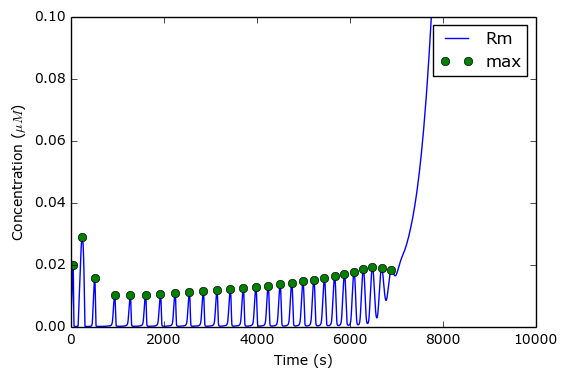

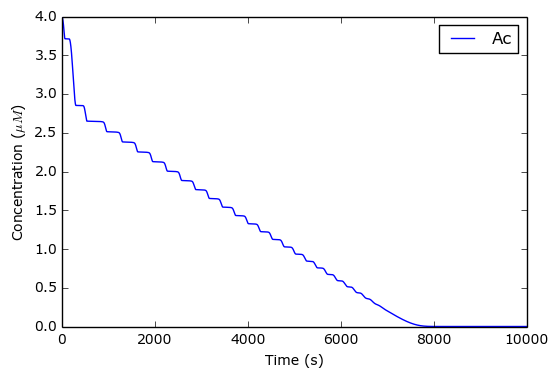

The mean period of oscillations is 263.388461538


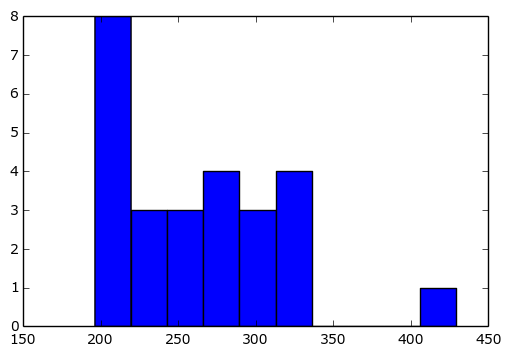

In [4]:
(t,Am,Bm,Rm,Ac) = dde_main(0.1,100.75,0.0001,0.1,0.0004,48.,59.3,4.,1.)
(t_max, R_max) = Rm_max(Rmslope(Rm))

plt.plot(t,Rm,label="Rm")
plt.plot(t_max, R_max,"o", label="max")
plt.ylim([0,0.1])
plt.xlabel("Time (s)")
plt.ylabel('Concentration ($\mu M$)')
plt.legend()
plt.show()

plt.plot(t,Ac,label="Ac")
plt.ylim([0,4])
plt.xlabel("Time (s)")
plt.ylabel('Concentration ($\mu M$)')
plt.legend()
plt.show()

plt.hist(np.diff(t_max))
print 'The mean period of oscillations is', np.mean(np.diff(t_max))

However, we notice that mean period is a bit long.  Therefore, through $\tau_1$ and $\tau_2$ we are able decrease the mean period.

The parameters used were:
{
 "k1": 0.1, 
 "k2": 100.75, 
 "k3": 0.0001, 
 "k4": 0.1, 
 "qR": 0.0004, 
 "tau1": 44.0, 
 "tau2": 55.0
}
The initial conditions used were: 
{
 "AB": 0, 
 "AR": 0, 
 "Ac": 4.0, 
 "Am": 0, 
 "Bc": 1.0, 
 "Bm": 0, 
 "Rm": 0.0
}


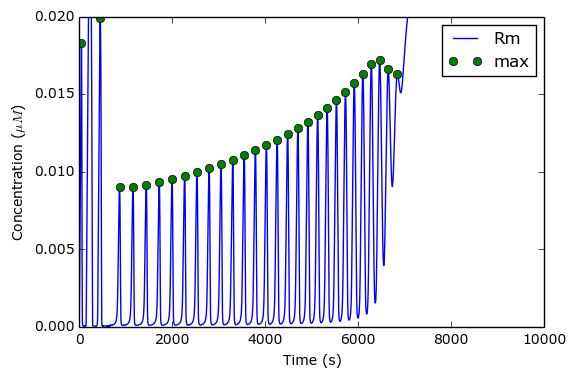

234.35172413793106

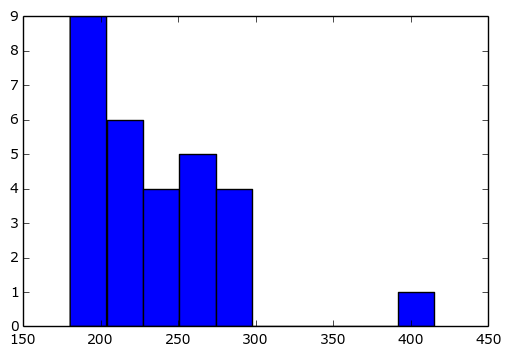

In [5]:
(t,Am,Bm,Rm,Ac) = dde_main(0.1,100.75,0.0001,0.1,0.0004,44.,55.,4.,1.)
(t_max, R_max) = Rm_max(Rmslope(Rm))

plt.plot(t,Rm,label="Rm")
plt.plot(t_max, R_max,"o", label="max")
plt.ylim([0,0.02])
plt.xlabel("Time (s)")
plt.ylabel('Concentration ($\mu M$)')
plt.legend()
plt.show()

# plt.plot(t,Ac,label="Ac")
# plt.ylim([0,4])
# plt.xlabel("Time (s)")
# plt.ylabel('Concentration ($\mu M$)')
# plt.legend()
# plt.show()

plt.hist(np.diff(t_max))
np.mean(np.diff(t_max))

We see that we can get oscillations for lower initial conditions.  However, it comes at a price.  Namely, $k_2$ must now be very, very large.  A phenomenon that I am having trouble to justify.  For the larger ICs, it was still $10^2$ - $10^3$ larger than $k_1$ and $k_3$ which is the same case here.  However, it poses a problem in justifying this rate.

### -----------------------------------------------------------------
Using this, we see if we can push the ICs even lower.  Going another order of magnitude lower, and changing the kinetic rates accordingly:
* k1, k3, qR decrease by an order of magnitude
* k2 increases by an order of magnitude
* the rest remain the same

We see that we indeed do continue to get oscillations.  We point out that we now get Reg concentrations of $0.001 \mu M = 1 nM$ which is below the characteristic concentration of a signaling protein.

The parameters used were:
{
 "k1": 1.0, 
 "k2": 1000.75, 
 "k3": 0.0001, 
 "k4": 1.0, 
 "qR": 4e-05, 
 "tau1": 44.0, 
 "tau2": 55.0
}
The initial conditions used were: 
{
 "AB": 0, 
 "AR": 0, 
 "Ac": 0.4, 
 "Am": 0, 
 "Bc": 0.1, 
 "Bm": 0, 
 "Rm": 0.0
}


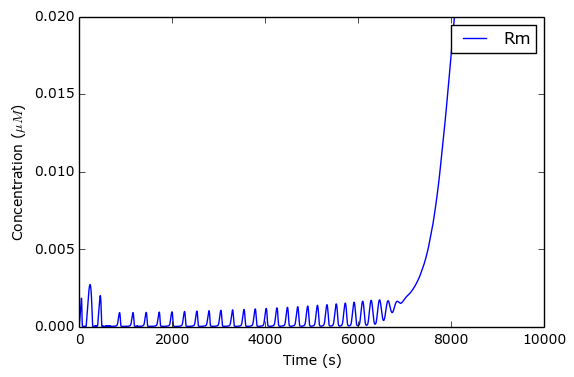

In [10]:
(t,Am,Bm,Rm,Ac) = dde_main(1.,1000.75,0.0001,1.,0.00004,44.,55.,.4,.1)
(t_max, R_max) = Rm_max(Rmslope(Rm))

plt.plot(t,Rm,label="Rm")
#plt.plot(t_max, R_max,"o", label="max")
plt.ylim([0,0.02])
plt.xlabel("Time (s)")
plt.ylabel('Concentration ($\mu M$)')
plt.legend()
plt.show()

# plt.plot(t,Ac,label="Ac")
# plt.ylim([0,4])
# plt.xlabel("Time (s)")
# plt.ylabel('Concentration ($\mu M$)')
# plt.legend()
# plt.show()

# plt.hist(np.diff(t_max))
# np.mean(np.diff(t_max))